#  Séries de Fourier sinus-cosinus

## Intro

### settings

In [1]:
%reset -f

In [2]:
!git clone https://github.com/vincentvigon/assets_signal

正克隆到 'assets_signal'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 277 (delta 0), reused 37 (delta 0), pack-reused 239 (from 1)
接收对象中: 100% (277/277), 51.11 MiB | 1.45 MiB/s, 完成.
处理 delta 中: 100% (85/85), 完成.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

np.set_printoptions(linewidth=500,precision=3,suppress=True)
plt.style.use("default")

### Sommaire

Une série de Fourier est la décomposition d'un signal (=fonction régulière) définie sur un intervalle de temps $[0,T]$ en une somme infinie d'ondes élémentaires. Ces ondes peuvent être:

* des fonctions sinus/cosinus
* uniquement des cosinus
* des fonctions exponentielles complexes

Il faut distinguer :

* Série de Fourier : le temps est $[0,T]$
* Transformée de Fourier : le temps est $\mathbb R$. Trop théorique pour nos besoins.
* Transformée de Fourier discrète : le temps est un ensemble fini $\{0,1,...,N-1\}$. Nous verrons ce cas pratique au prochain chapitre.

### Termes techniques

Après avoir lu ce chapitre, vous serez peut-être familier avec tous ces termes (sinon, relisez ce chapitre!)

* Séries de Fourier
* Temps continu/temps discret
* Base d'onde SinCos, base d'onde exponentielle
* Période, fréquence
* Fonction lisse par morceaux
* Produit scalaire, produit hermitien, orthogonalité, orthonormalité
* Phénomène de Gipps, convergence absolue
* Symétrie hermitienne
* Spectre, demi-spectre, spectre d'amplitude, coefficient de Fourier, coordonnées
* Approximation du signal, filtration du signal, compression du signal
* Filtres passe-bas, filtres passe-haut, filtres passe-bande
* Échantillonnage parfait
* Polynôme orthogonal, polynôme de Legendre, point de Gauss
* Base de Hilbert, identité de Plancherel-Parseval, isométrie
* Énergie d'un signal

## Signaux

### Définition

Les signaux à temps continu sont définis sur un intervalle de temps $[0,T]$. Les signaux les plus connus sont des sons. Les sons sont produits par les variations rapide de la pression de l'air.

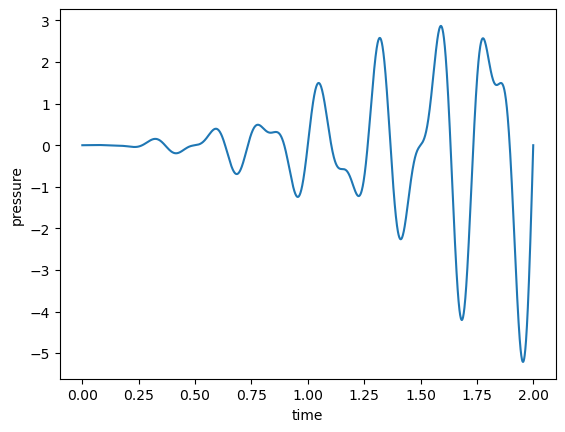

In [5]:
#time
t=np.linspace(0,2,2000)
#signal
signal0=(np.sin(4*2*np.pi*t)+0.5*np.sin(7*2*np.pi*t))*t**2

fig,ax=plt.subplots()
ax.plot(t,signal0)
ax.set_xlabel("time")
ax.set_ylabel("pressure");

### Signal périodique

Une fonction périodique se répète après un certain temps.

***Définition :***

* Une fonction $f$ de période $T>0$ lorsque $f(t + T) = f(t)$ pour tout $t$.
* **La** période d'une fonction $f$ est la plus petite $T>0$ telle que $f$ soit $T$-périodique
* La fréquence d'une fonction périodique est le nombre de cycles complets qui peuvent se produire par seconde. C'est donc l'inverse de la période.

Remarques :

* une fonction $T$-périodique est aussi $nT$-périodique pour $n=2,3,...$.
* On peut dire qu'une fonction non périodique a une période $0$ et une fréquence $\infty$ mais je préfère dire que c'est une fonction non périodique
* Il est naturel et utile de dire que la fonction constante a une fréquence $0$.
* L'unité de fréquence est le « Hertz », abrégé en « Hz ». Physiquement : Hz=$s^{-1}$.

In [10]:
"A periodic signal (but only ploted on a bounded interval)"
t=np.linspace(0,2,2000)
signal1=np.sin(4*2*np.pi*t)+0.5*np.sin(8*2*np.pi*t)
fig,ax=plt.subplots()
ax.plot(t,signal1);

#### ♡♡♡♡♡♡


***A vous:*** Donnez la période et la fréquence des signaux suivants:

*   $t \to \sin(4*2\pi*t)$
*  $t \to \sin(4*t)$
*  $t \to \sin(3*2\pi*t)+\sin(4*2\pi*t)$.  
*   $t \to \sin(3*2\pi*t)*\sin(4*2\pi*t)$.  
*   $t\to \cos\big(\sin( \pi t/20 )\,/\,\sin(\pi t/30)\big)$.

*  $t \to \sin(4*2\pi*t)+\sin(7*t)$




***Aide:***  Considérons $f_1$ une fonction $T_1$-périodique  et $f_2$ une fonction $T_2$-périodique. Considérons
$$
f(t) = fonction(f_1(t),f_2(t))
$$
Que peut-on dire de $f(t+T)$ quand $T$ est à la fois multiple de $T_1$ et de $T_2$? On en déduit que la période de $f$ est le plus petit  <font color="red"> □ □ □ </font>

Et par conséquent, la fréquence de $f$ est le plus <font color="red"> □ □ □ </font>






#### ♡♡

Vérifions visuellement que le 3 ième signal est bien 2 périodique

In [11]:
t = np.linspace(0,10,1000)
y=

fig,ax=plt.subplots(figsize=(15,4))
ax.
for s in [0,2,4,6,8,10]:
    ax.axvline(s,color="k",linestyle=":")

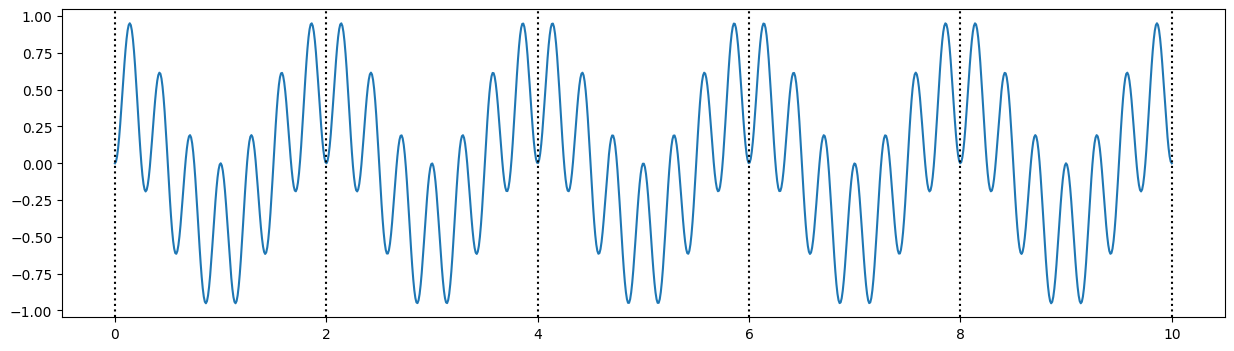

In [11]:
#--- To keep following outputs, do not run this cell! ---

## Décomposition sin-cos

Durant toute cette section, nous travaillerons sur un intervalle de temps $[0,T]$ avec $T=2$ secondes. Une fonction définie sur cet intervalle peut être soit :

* une partie d'un signal périodique de période $T$ (donc, on le prolonge implicitement périodiquement),
* soit simplement un signal pris sur un intervalle fini (ex : l'enregistrement d'un son).

In [12]:
"""we define our time interval,
and its discretisation"""
T=2
nb_points=200
t=np.linspace(0,T,nb_points,endpoint=False)
"""the amount of time between two points """
step=T/nb_points

### Régularité des signaux

***Définition :*** Une fonction $f$ est lisse par morceaux lorsque $f$ et $f'$ sont continues par morceaux.

C'est la régularité satisfaite par tous les signaux que nous rencontrons dans la nature. Ainsi, à partir de maintenant : **le mot « signal » signifie « fonction lisse par morceaux »**.

Voici deux régularités supplémentaires qui peuvent se produire ou non :

* Un signal $f$ peut être continu (sans saut).
* Un signal $f$ peut être continu et satisfaire à $f(0)=f(T)$.



#### ♡

***À vous :*** Quel est l'intérêt de la condition $f(0)=f(T)$ lorsque l'on souhaite prolonger $f$ périodiquement sur $\mathbb R$ ?

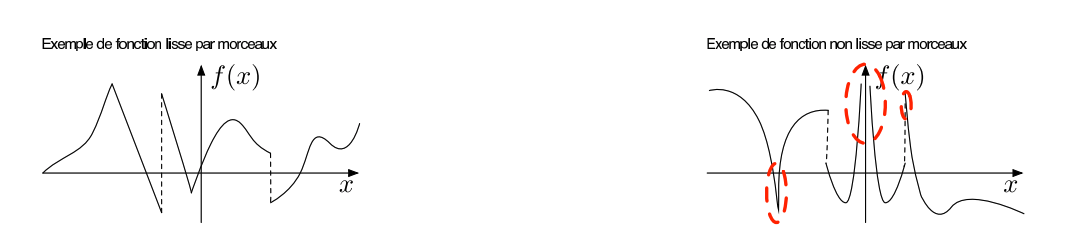

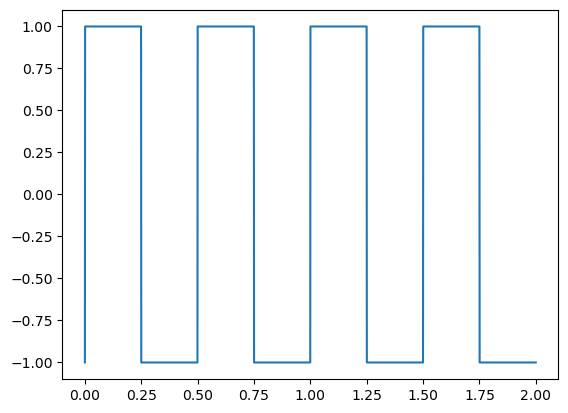

In [6]:
"""example of a non-continuous signal.
Jumps are the vertical lines"""
def square_signal(t):
    posi=(np.sin(4*np.pi*t)>0)
    f=np.empty(len(t))
    f[posi]=1
    f[~posi]=-1
    return f
t=np.linspace(0,2,2000)
plt.plot(t,square_signal(t));

#### ♡♡♡

***À vous :*** Modifiez le dessin ci-dessus pour que les parties verticales disparaissent (plus réaliste pour les sauts). Aide : c'est très simple, il suffit de changer le style !

***À vous :*** Ajoutez un argument à `square_signal()` qui peut régler la période.


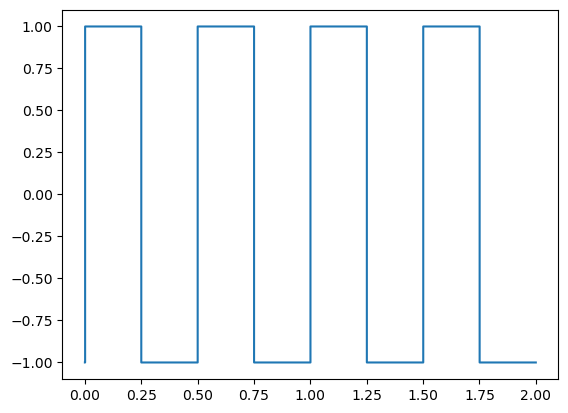

In [7]:
def square_signal(t):
    posi = (np.sin(4 * np.pi * t) > 0)
    f = np.empty(len(t))
    f[posi] = 1
    f[~posi] = -1
    return f

t = np.linspace(0, 2, 2000)
plt.plot(t, square_signal(t), drawstyle='steps-post') 

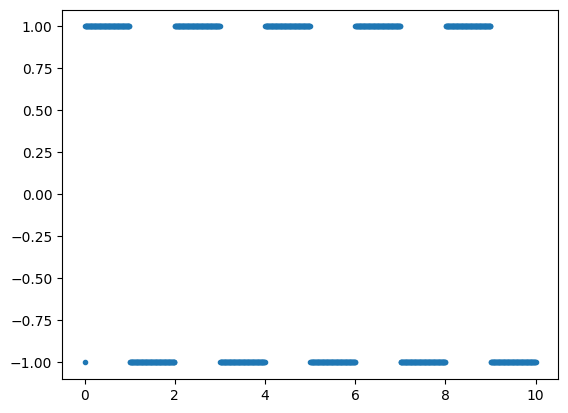

In [14]:
#--- To keep following outputs, do not run this cell! ---

#### ♡♡♡♡

 Créez une fonction `triangle_signal()` qui produit les dents d'une scie. C'est un exemple de signal continu.

In [15]:
def frac(t):
    return t - np.floor(t)

def triangle_signal(t, period):
    np.abs( 2*frac(...

fig, ax = plt.subplots()

t=np.linspace(0,10,1000)
plt.plot(t,triangle_signal(t,2));

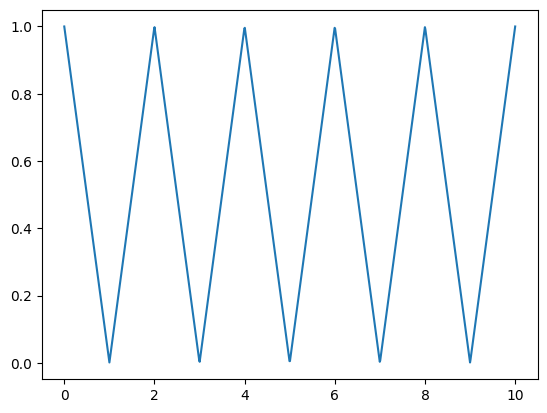

In [15]:
#--- To keep following outputs, do not run this cell! ---

### Un produit scalaire


Pour $f$ et $g$ des signaux sur $[0,T]$, on définit:
$$
 \mathtt{dot}(f,g) = \frac 2 T \int_0^T f(t) g(t) \, dt
$$


C'est un produit scalaire, ce qui signifie qu'il vérifie les axiomes suivantes:
* Symmétrie $\mathtt{dot}(f,g)=\mathtt{dot}(g,f)$
* Bilinéarité: $f\to \mathtt{dot}(f,g)$ et $g\to \mathtt{dot}(f,g)$ sont linéaires.
* Défini-positif:
$$
\mathtt{dot}(f,f)\geq0 \qquad \text{et} \qquad   \mathtt{dot}(f,f)= 0\Leftrightarrow f=0
$$





#### ♡♡♡

***A vous :***  Vérifiez que ces 3 propriétés sont satisfaites par $\mathtt{dot}()$. Pour la dernière, il faut utiliser la régularité implicite des signaux $f$.

### Intégration numérique


Le code suivant illustre les différentes approximations utilisée pour faire le l'intégration numérique.

Pour les détails, suivre ce [lien](http://userpages.irap.omp.eu/~rbelmont/mypage/numerique/integration.pdf)

In [16]:
def one_approx(x,a,b,f,kind):
    if kind=="rectangle":
        return f(a)*np.ones_like(x)
    elif kind=="mid-point":
        return f((a+b)/2)*np.ones_like(x)
    elif kind=="trapeze":
        fa=f(a)
        fb=f(b)
        return (fa+fb)/2 + (fb-fa)/(b-a)*(x-(a+b)/2)
    elif kind=="simpson":
        fa=f(a)
        m=(a+b)/2
        fm=f(m)
        fb=f(b)
        return 2*(fa-2*fm+fb)/(b-a)**2 *(x-m)**2 +(fb-fa)/(b-a)* (x-m) +fm

In [17]:
f=lambda x: np.sin(3*x)*np.sin(2*x)

In [18]:
fig,axs=plt.subplots(4,1,figsize=(12,8),sharex="all",sharey="all")

points=np.arange(0,11)

for a,b in zip(points[:-1],points[1:]):
    x=np.linspace(a,b,50)

    for i, kind in enumerate(["rectangle","mid-point","trapeze","simpson"]):
        axs[i].plot(x,one_approx(x,a,b,f,kind))
        axs[i].plot(x,f(x),"k")
        axs[i].set_title(kind)

fig.tight_layout()

#### ♡♡


Quelle est la vitesse de convergence de chacune des méthodes ?



### L'approximation que nous allons utiliser:

Voici l'implémentation du produit scalaire que l'on va utiliser

In [19]:
#the informatic version of the scalar product.
#The integral is approximate by a sum
def dot(f,g):
    return 2*np.sum(f*g)/len(f)

#### ♡♡


***A vous:*** Dans la fonction `dot` on utilise une méthode d'approximation numérique de l'intégrale. Laquelle ? Justifiez par un mini-calcul.



In [20]:
"let's test the dot product"
t=np.linspace(0,2*np.pi,2000)
f=np.sin(t)
g=np.ones_like(t)
dot(f,g)

#### ♡

Pourquoi trouve-t-on un tout petit nombre dans notre test?

### La famille sin-cos


Nous définissons des fonctions spéciales ur $[0,T]$:
\begin{align*}
\sin_n(t)& =\sin(2\pi \frac {nt} T),  \qquad \forall n\geq 1 \\
\cos_{n}(t) & =\cos(2\pi \frac {nt} T),  \qquad \forall n\geq 1
\end{align*}


En y ajoutant la fonction constante $t \to  \frac 1 {\sqrt 2}$,
on forme la famille sin-cos $(sc_n)_{n\in \mathbb N} $ :
\begin{align*}
sc_0(t)&= \frac 1 {\sqrt 2}\\
sc_{2i-1}(t)& =\sin_i(t),  \qquad \forall i\geq 1 \\
sc_{2i}(t) & =\cos_i(t),  \qquad \forall i\geq 1
\end{align*}

Nous allons constater (puis démontrer plus tard) que c'est une famille orthonormale pour notre produit scalaire.


In [21]:
"""The begin of the sinCos family, stacked in a matrix.
The n-th line is the discretization of sc_n(t)"""
def compute_sinCos_basis(t,T,M):
    """
    Args:
         t (1d-array) : time discretized
         T (int) : Duration
         M (int) : number of different frequencies, so the size of the basis is 2N+1
    """

    basis_sc=np.empty([2*M+1,len(t)])
    basis_sc[0]=np.ones_like(t)/np.sqrt(2)
    for i in range(1,M+1):
        basis_sc[2*i-1,:]=np.sin(i*2*np.pi*t/T)
        basis_sc[2*i,:]=np.cos(i*2*np.pi*t/T)

    return basis_sc

In [22]:
T=2
n_point=200
M=5
t=np.linspace(0,T,n_point,endpoint=False)
basis_sc=compute_sinCos_basis(t,T,M)

for i in range(len(basis_sc)):
    plt.plot(t,basis_sc[i,:])

In [23]:
"""compute some dot-product to check the orthonormality"""
many_dot_products=np.empty([len(basis_sc),len(basis_sc)])

for i in range(len(basis_sc)):
    for j in range(len(basis_sc)):
        many_dot_products[i,j]=dot(basis_sc[i,:],basis_sc[j,:])

print(many_dot_products)

#### ♡♡♡♡

***A vous :*** $(2\heartsuit)$ Le code précédent est pédagogique mais pas efficace. Pour le rendre plus rapide : supprimez la fonction `dot` et supprimez la double boucle sur `i` et `j` pour recalculer la matrice ci-dessus à l'aide du produit matriciel `@`.


Vous pouvez aussi jouer à noter tous les endroits où le code peut être optimisé dans ce qui suit.

In [24]:
#many_dot_products[i,j] = \sum_k basis_sc[i,k] basis_sc[j,k])*T/n_point
basis_sc @ basis_sc.T *(T/n_point)

### Approximation sin-cos

Un signal $f$ peut être décomposé en une somme infinie d'éléments de la famille si-cos :
$$
f(t)=\sum_{n\in \mathbb N} a_n \, sc_n(t)
$$
Grâce à l'orthonormalité, les coordonnées $a_n$ ont une expression simple :
$$
a_n= \mathtt{dot}(f,sc_n)
$$

En particulier, un signal peut être approximé par une somme finie d'éléments de la famille sin-cos :
$$
f(t) \simeq\sum_{n=0}^{2M+1} a_n \, sc_n(t)
$$

In [29]:
"""here is the function to decompose"""
T=2
nb_points=30
t=np.linspace(0,2,nb_points,endpoint=False)
f=(t-1)**2
plt.plot(t,f);

In [30]:
M=10
basis_sc=compute_sinCos_basis(t,T,M)
basis_sc.shape

In [31]:
"""the coordinate of f in the sinCos family.
Because of the orthonormality, this coordinate are very easy to compute"""
coordinates=np.empty(len(basis_sc))

for i in range(len(basis_sc)):
    coordinates[i]=dot(f,basis_sc[i,:])

plt.plot(range(len(basis_sc)),coordinates,".");

#### ♡♡

***À vous :*** Expliquez la particularité des points ci-dessus.

In [33]:
"""each line of the following matrix represent an approximation of the signal f """
approximations=np.empty([len(basis_sc),nb_points])
for i in range(len(basis_sc)):
    coor_troncated=coordinates.copy()
    coor_troncated[i:]=0
    approximations[i,:]=coor_troncated@basis_sc
    #ou plus proche des maths:
    #approximations[i,:]=basis_sc @ coor_troncated[:,None]


approximations.shape

In [34]:
"""let's plot some of the approximations"""
nb_plots=4
fig,axs=plt.subplots(nb_plots,figsize=(5,nb_plots*3),sharex=True)
fig.tight_layout()

for i in range(nb_plots):
    axs[i].plot(t,approximations[2*i,:])
    axs[i].plot(t,f)
    axs[i].set_title("nb sinCos="+str(2*i))

#### ♡♡♡♡

Faites le graphique d'erreur, qui illustre comment l'erreur entre la fonction `f` et ses approximations diminue.

* Pour la norme $L_2$ utilisez `dot()`
* Pour la $L_\infty$ utilisez `np.max()`

In [40]:

fig,ax=plt.subplots()

errors_L2 = []
errors_Loo= []


for approximation in approximations:
    errors_L2.append(
    errors_Loo.append(

ax.plot(errors_L2, label=r"Erreur $L_2$")

ax.plot(errors_Loo, label=r"Erreur $L_\infty$")
#ax.set_xscale("log")
ax.set_yscale("log")
ax.legend();

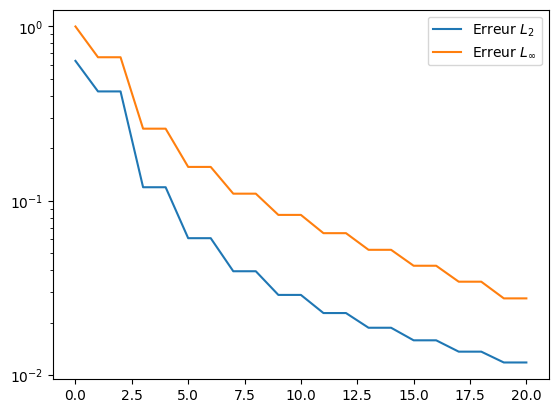

In [40]:
#--- To keep following outputs, do not run this cell! ---

## Phénomène de Gipps et théories

### Créer un code général

Nous encapsulons tout le code précédent dans une classe, que nous utiliserons plusieurs fois dans la suite. Le but est aussi de vous montrer comment les objets permettent de bien organiser votre code.

In [73]:
class Decomposer:

    def __init__(self,t,basis,dot_fn,dtype=np.float64):

        self.t=t
        self.basis=basis
        self.dot=dot_fn
        self.dtype=dtype


    def check_ortho(self):

        nb=len(self.basis)


        res=np.empty([nb,nb],self.dtype)
        for i in range(nb):
            for j in range(nb):
                res[i,j]=self.dot(self.basis[i,:],self.basis[j,:])
        print(res)


    def compute_coordinates(self,f,plotThem=False):


        coordinates=np.empty(len(self.basis),dtype=self.dtype)

        for i in range(len(self.basis)):
            coordinates[i]=self.dot(f,self.basis[i,:])

        if plotThem:
            plt.plot(range(len(self.basis)),self.OUT_coordinates,".")

        return coordinates



    def compute_approximations(self,f,approx_indexes,plotThem=False):


        assert max(approx_indexes)<=len(self.basis), "approximation index can not be greater than the size of the basis"

        coordinates=self.compute_coordinates(f)


        """each line of the folowing matrix represent an approximation f_N of the signal f """
        approximations=np.empty([len(approx_indexes),len(self.t)],dtype=self.dtype)


        for i,j in enumerate(approx_indexes):
            coor_troncated=coordinates.copy()
            coor_troncated[j:]=0
            approximations[i,:]=coor_troncated@self.basis


        if plotThem:
            nb=len(approx_indexes)
            if nb<=1: nb=2 # to avoid a bug when we write axs[i]
            fig,axs=plt.subplots(nb,1,figsize=(8,nb*2))


            for i in range(len(approx_indexes)):
                axs[i].plot(self.t,f)
                axs[i].plot(self.t,approximations[i,:])
                axs[i].set_title("sum of "+str(approx_indexes[i])+" terms")

            fig.tight_layout()


        #sauvegarde pour les méthode plus bas
        self.OUT_approximations=approximations
        self.approx_indexes=approx_indexes
        self.f=f


        return approximations



    def compute_L2_error(self):

      assert self.OUT_approximations is not None, "Call compute_approximations() before compute_L2_error()."


      L2_error=np.empty(len(self.approx_indexes),dtype=self.dtype)

      for i in range(len(self.approx_indexes)):
        L2_error[i]=np.sqrt( dot(self.f-self.OUT_approximations[i], self.f-self.OUT_approximations[i]) )


      return L2_error



    def compute_Loo_error(self, plotThem=False):

      assert self.OUT_approximations is not None, "Call compute_approximations() before compute_Loo_error()."

      Loo_error=np.empty(len(self.approx_indexes),dtype=self.dtype)

      Loo_error = np.max(np.abs(self.f - self.OUT_approximations), axis=1)

      return Loo_error


***A vous :*** Pourquoi la classe précédente ne peut pas être remplacée par une fonction simple ?

In [74]:
T=2
t=np.linspace(0,T,2000,endpoint=False)
basis_sc=compute_sinCos_basis(t,T,10)
decomposer=Decomposer(t,basis_sc,dot)

In [75]:
decomposer.compute_approximations((t-1)**2,[1,5,7],plotThem=True);

In [76]:
decomposer.compute_approximations(t**2,[1,5,7],True);

Pourquoi l'approximation de $t^2$ est beaucoup plus mauvaise que cette de $(t-1)^2$?

### Phénomène de Gipps





In [77]:
f_discont=square_signal(t)
plt.plot(t,f_discont);

In [84]:
basis_sc_big=compute_sinCos_basis(t,T,500)
basis_sc_big.shape

In [86]:
decomposer=Decomposer(t,basis_sc_big,dot)

In [89]:
approx_indices=[10,50,100,150,200,500,1000]
decomposer.compute_approximations(f_discont,approx_indices,True);

On voit que les approximations convergent dans $L_2$ mais pas dans $L_\infty$:au niveau de chaque discontinuité on voit une grande oscillation, c'est le phénomène de Gipps. Remarquons que cette oscillation est aussi présente aux extréminté de l'intervalle où apparait la discontinuité quand on essaye de périodiser la fonction.

In [90]:
error_L2 = decomposer.compute_L2_error()
error_Loo = decomposer.compute_Loo_error()


fig,ax=plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')

ax.plot(approx_indices, error_L2, label="L2 error")
ax.plot(approx_indices, error_Loo, label="Loo error")
ax.legend();

### Résumé en un théorème

Le théorème suivant résume tout ce que nous avons vu :

> ***Le théorème en 3 points, version sinCos :***
* La famille $(sc_n)$ est orthonormée pour $\mathtt{dot}()$
* Les signaux $f$ peuvent s'écrire :
\begin{align*}
f(t) &= \sum_{n\in \mathbb N} a_n \, sc_n(t) \\
&= \frac{a_0}{\sqrt 2} + \sum_{i\geq 1} a_{2i-1} \sin(2\pi \frac{it}{T}) +a_{2i} \cos(2\pi \frac{it}{T})
\end{align*}
* la somme converge pour tout $t$ où $t\to f(t)$ est continu
* lorsque $f$ est continu et $f(0)=f(T)$ la convergence est uniforme.
* Les coordonnées $a_n$ sont faciles à calculer $a_n=\mathtt{dot}(f,sc_n)$.

***Commentaires :***

* Le premier point est souvent démontré en utilisant des identités trigonométriques produit-à-somme, par exemple :
$$
2\cos(\theta)\cos(\phi)=\cos(\theta-\phi)+\cos(\theta+\phi)
$$
Mais nous utiliserons un argument vraiment plus simple plus tard.
* Le deuxième point est la partie difficile. Cela signifie que notre famille sinCos est une sorte de base pour les signaux. En fait, si nous choisissons de travailler sur le contexte $L^2$, c'est une base de Hilbert (voir plus loin).
* Les coordonnées $a_n$ sont appelées « coefficients de Fourier sinCos », parfois nous les désignons par $a_n(f)$ ou $\hat f(n)$ ou $Fourier[f](n)$.
* Vérifions la formule qui permet de calculer les coefficients de Fourier :
\begin{align*}
& \mathtt{dot}\Big(f,sc_n\Big) \\
=& \mathtt{dot}\Big( \sum_{m} a_m \, sc_m(t) \ , \ sc_n \Big) \\
=& ...\\
=&a_n
\end{align*}

#### ♡♡♡♡

***À vous :***

*  Complétez le calcul ci-dessus. Si vous voulez être rigoureux, vous pouvez vous limiter au cas où la série converge uniformément.
*  Pourquoi, lorsque $f$ présente des discontinuités, il est impossible que la série converge uniformément ?

## Décomposition en cosinus uniquement

Nous travaillons maintenant sur un intervalle de temps symétrique $[-\frac T 2 , +\frac T 2]$. Si nous avons en tête des fonctions périodiques, nous ne décomposons que la fenêtre où nous observons ces fonctions. Le nouveau produit scalaire est bien sûr :
$$
\mathtt{dot} (f,g) = \frac 2 T \int_{-\frac T 2}^{+\frac T 2} f(t) g(t) \, dt
$$
La version informatique de ce produit scalaire ne change pas du tout !

Une fonction paire $f_{even}$ ne peut être décomposée qu'avec les termes cosinus : tout simplement parce que les coordonnées relatives au sinus sont nulles :
$$
\frac 1 T \int_{-\frac T 2}^{+\frac T 2} f_{even}(t) \sin_n(t) \, dt=0
$$
Observons ceci.

In [91]:
"""we define our time interval,
and its discretisation"""
T=2
t=np.linspace(-T/2,T/2,200,endpoint=False)

In [92]:
def compute_cos_basis(t,T,nb_freq):
    basis=np.empty([nb_freq+1,len(t)])
    basis[0]=np.ones_like(t)/np.sqrt(2)
    for i in range(nb_freq):
        basis[i+1,:]=np.cos((i+1)*2*np.pi*t/T)

    return basis

In [93]:
basis_cos=compute_cos_basis(t,T,10)

for i in range(7):
    plt.plot(t,basis_cos[i,:])

In [94]:
f_even=t**2
plt.plot(t,f_even);

In [95]:
decomposer=Decomposer(t,basis_cos,dot)

In [96]:
decomposer.compute_approximations(f_even,[2,5,7,11],True);

Cette simple observation nous donne une idée pour créer une décomposition pour des signaux définis sur $[0,\frac T 2 ]$ avec uniquement du cosinus. Cette décomposition est plus simple, et souvent utilisée en pratique (ex : compression JPEG).



#### ♡♡♡♡


***À vous :***  Expliquez cette idée, et expliquez pourquoi cette décomposition uniquement en cosinus est moins sujette au phénomène de Gipps.



#### ♡♡♡♡♡


***À vous :*** Faites un programme qui calcule la décomposition uniquement en cosinus des signaux définis sur $[0,\frac T 2 ]$. Pour ne pas éviter des calculs inutiles, vous devez modifier les codes précédents. Testez votre programme avec $f(t)=t$ défini sur un intervalle (qu'on peut noter $[0,\frac T 2 ]$ pour s'aider). Attention, c'est très court, mais délicat.